<img src="images/backdrop.png">
 
 
### Dates/Deadlines

Code: <i>05/05/2019 (one week before submission)</i><br />
Report: <i>12/05/2019 (12:00 - noon)</i><br />


### Tasks that need doing
 * Plot map of Manhatten 
 * Create accuracy checker thing
 * Calculate distance between pick up and drop of (haversine)
 * Create method to plot actual vs predicted
 * Determine if holidays and weekends affect the trip duration
 * Perform PCA on dataset
 * Train model using XGBoost
 * Train Model using ... (Caitlin)
 * Train Model using Ada Boost (Tze-yi)
 * Train Model using KNN (Runyu)
 * Train Model using random forest or neural network (Leyan)
 * Compare results of all regression methods
 
### Report

<p>We need to submit seperate reports, so everyone needs to have enough to do and everyone needs enough time to write about what it is we have done</p>

 * "Each team member submits their own independent write up. They also submit all of the code for the entire team. You may want to use the universities github service"
 * "The report has a 3000 word limit and must be a pdf file"
 
### Mark Scheme

The key aim here is to go beyond ‘off-the-shelf’, that is, you need to implement a solution
that is justifiably customised to the problem to get full marks. This doesn’t necessarily mean
the machine learning algorithms are unique, but that the approach as a whole is. This can
include feature design, combining multiple algorithms (system or ensemble), using further
data, sneaky tricks etc. You get marks for being smart, not for being complicated.
This project is worth 30% of your marks for the unit: <br />

 *  <b>5 marks</b>: Clearly explaining the problem and identifying ways to go beyond a problem-agnostic machine learning approach.
 * <b>5 marks</b>: Clearly explaining the solution(s) of your team as a whole, including identifying which details of the problem it exploits and how.
 * <b>10 marks</b>: A technical write up of the module(s) you contributed to your team. What they contribute, how they work, technical details. If they have a model give it; summarise any optimisation that occurs.
 * <b>10 marks</b>: Iterative evidence driven improvement, e.g. using the results of experiments to identify weaknesses with the current solution, proposing and implementing fixes, and then verifying via further experiments. While you write this section yourself it may discuss everything done within the team.
 
for a total of <b>30 marks</b>

 
### Links

[Data](https://www.kaggle.com/c/nyc-taxi-trip-duration/data)<br />
[GitHub](https://github.com/Xethagona/Taxi-Coursework)<br />
[Spreadsheet](https://docs.google.com/spreadsheets/d/1oDq2rzWd1lVhdg2UYh2J4zRbN8XWPYKDrr4scczLoog/edit?usp=sharing)


### Comments

 * I'd recommend labelling and titling your graphs

In [1]:
#Importing
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import math

%matplotlib inline

### Reading data from ZIP and converting to Pandas

Keeping the training and testing dataset as zip files reduces the file size 

In [59]:
#Creating zipFile instances 
training_zip = zipfile.ZipFile('train.zip') 
testing_zip = zipfile.ZipFile('test.zip') 

#Reading CSV file from zipFile instance 
train = pd.read_csv(training_zip.open('train.csv'))
test = pd.read_csv(testing_zip.open('test.csv'))

### Data visualising 

In [3]:
train = train.dropna()
### remove the text 'id' in the id column
train['id'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
train.sort_values(by='id').reset_index(drop=True)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,0000001,2,2016-06-14 10:43:10,2016-06-14 11:01:35,1,-74.013924,40.713924,-73.971649,40.746407,N,1105
1,0000003,2,2016-03-16 10:39:55,2016-03-16 10:57:21,5,-73.990753,40.754761,-74.007118,40.741531,N,1046
2,0000005,2,2016-04-25 09:50:48,2016-04-25 09:56:56,1,-73.953110,40.798580,-73.968178,40.800270,N,368
3,0000008,1,2016-06-15 09:57:05,2016-06-15 10:02:08,1,-74.009628,40.724762,-74.015869,40.715485,N,303
4,0000009,1,2016-05-08 01:43:11,2016-05-08 01:52:18,1,-73.987991,40.759899,-73.959686,40.798504,N,547
5,0000011,2,2016-03-04 22:20:52,2016-03-04 22:25:08,1,-73.969185,40.765926,-73.981659,40.762234,N,256
6,0000013,1,2016-02-19 13:58:59,2016-02-19 14:06:06,1,-73.973442,40.763786,-73.978828,40.751858,N,427
7,0000015,1,2016-05-17 09:06:59,2016-05-17 09:39:18,1,-73.983696,40.780949,-73.954376,40.764175,N,1939
8,0000016,1,2016-03-29 16:36:36,2016-03-29 16:42:54,1,-73.960320,40.770321,-73.946220,40.772736,N,378
9,0000020,2,2016-03-13 03:48:46,2016-03-13 03:53:43,3,-74.004204,40.742226,-73.994507,40.751823,N,297


In [4]:
### visualisation

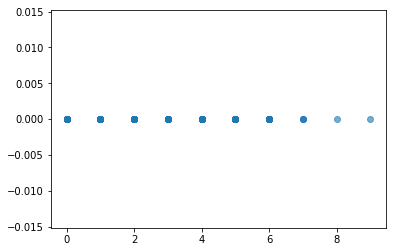

In [5]:
x1=train['passenger_count'].values
y1=np.zeros(1458644)
plt.scatter(x1,y1,alpha=0.6)
plt.show() 

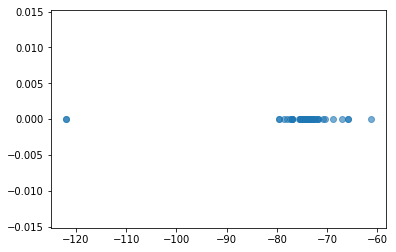

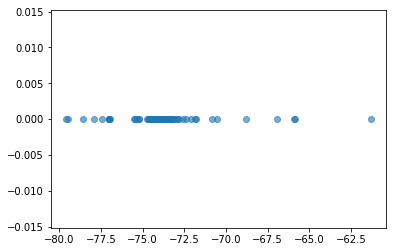

In [6]:
x2=train['pickup_longitude'].values
y2=np.zeros(1458644)
plt.scatter(x2,y2,alpha=0.6)
plt.show()

index_drop = train.index[train['pickup_longitude'] < -120].tolist()
train = train.drop(index_drop)

train[train['pickup_longitude'] < -120]

x2=train['pickup_longitude'].values
y2=np.zeros(1458642)
plt.scatter(x2,y2,alpha=0.6)
plt.show()                 

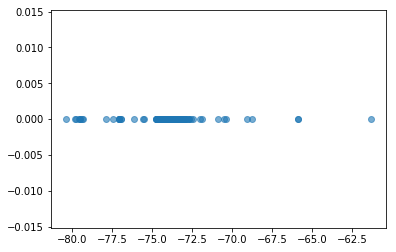

In [7]:
x3=train['dropoff_longitude']. values
y3=np.zeros(1458642)
plt.scatter(x3,y3,alpha=0.6)
plt.show()



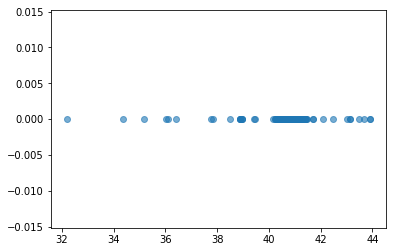

In [8]:
x4=train['dropoff_latitude'].values
y4=np.zeros(1458642)
plt.scatter(x4,y4,alpha=0.6)
plt.show()



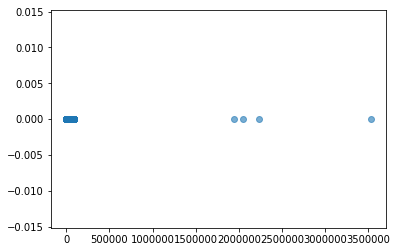

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


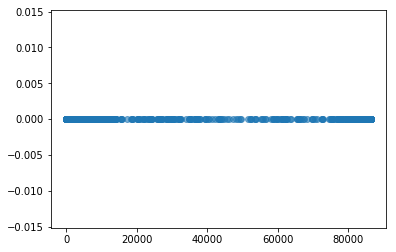

In [9]:
x5=train['trip_duration'].values
y5=np.zeros(1458642)
plt.scatter(x5,y5,alpha=0.6)
plt.show()


index_drop = train.index[train['trip_duration'] >1500000].tolist()
train = train.drop(index_drop)
display(train)


x5=train['trip_duration'].values
y5=np.zeros(1458638)
plt.scatter(x5,y5,alpha=0.6)
plt.show()

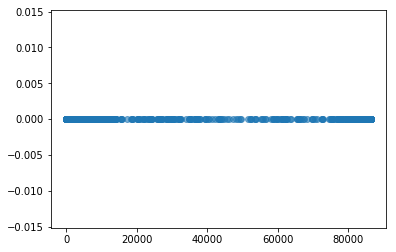

In [10]:
x5=train['trip_duration'].values
y5=np.zeros(1458638)
plt.scatter(x5,y5,alpha=0.6)
plt.show()

In [11]:
# train split to 75/25

split = len(train) * 0.75

train_train = train.loc[:split,:]
train_test = train.loc[split:,:]

print('Taining total set size:',train.shape[0])
print('Training set size:', train_train.shape[0])
print('Test set size:', train_test.shape[0])

Taining total set size: 1458638
Training set size: 1093974
Test set size: 364664


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(train, test_size=0.25)

print('Taining total set size:',train.shape[0])
print('Training set size:', X_train.shape[0])
print('Test set size:', X_test.shape[0])

Taining total set size: 1458638
Training set size: 1093978
Test set size: 364660


### Data Preprocessing

Investigating averages from the data

Data: 19/04/2019

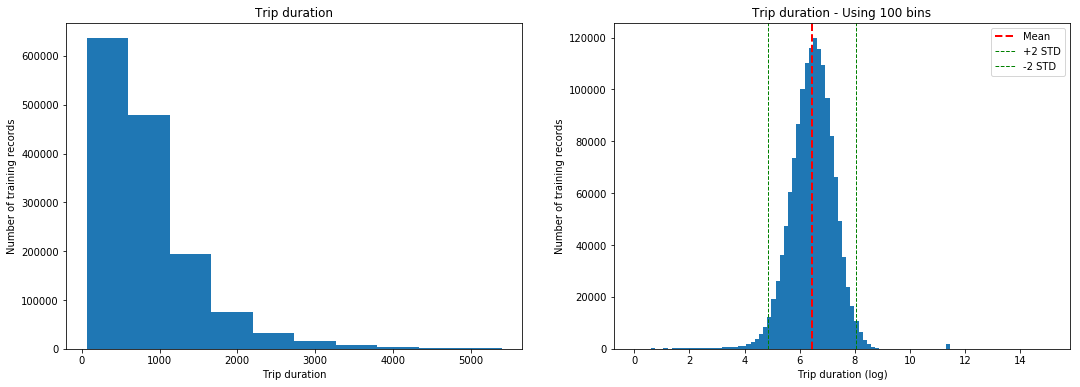

In [207]:
#Average length of a trip (Add log)
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(bob['trip_duration'])
plt.title("Trip duration")
plt.xlabel("Trip duration")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(train['trip_duration']), bins=100)
plt.axvline(np.log(train['trip_duration']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(train['trip_duration']).mean() + 2*np.log(train['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(train['trip_duration']).mean() + -2*np.log(train['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Trip duration - Using 100 bins")
plt.xlabel("Trip duration (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()

Trips duration longer than:
	1.5 Hours: 3097 | 0.212%
	2.0 Hours: 2253 | 0.154%
	3.0 Hours: 2112 | 0.145%

Trips duration shorter than:
	30 Seconds: 4890 | 0.335%
	60 Seconds: 8777 | 0.602%


Removing: 7987 rows


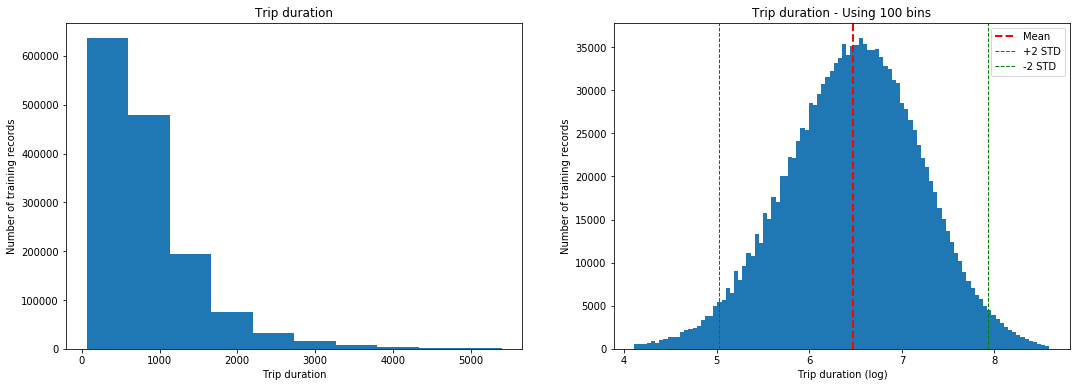

In [206]:
#Removing trips longer than or short than specfic values
longThan  = (60*60)* 2 #2 hours
longThan2 = (60*60)* 3 #3 hours
longThan3 = (60*60)* 1.5 #1.5 hours
shortThan = 30 #30 seconds
shortThan2 = 60 #1 minute

bob = train

print("Trips duration longer than:")
print('\t1.5 Hours: %d | %0.3f%%' % (sum(bob['trip_duration'] > longThan3), (sum(bob['trip_duration'] > longThan3)/len(bob))*100))
print('\t2.0 Hours: %d | %0.3f%%' % (sum(bob['trip_duration'] > longThan), (sum(bob['trip_duration'] > longThan)/len(bob))*100))
print('\t3.0 Hours: %d | %0.3f%%' % (sum(bob['trip_duration'] > longThan2), (sum(bob['trip_duration'] > longThan2)/len(bob))*100))
print("")

print("Trips duration shorter than:")
print('\t30 Seconds: %d | %0.3f%%' % (sum(bob['trip_duration'] <= shortThan), (sum(bob['trip_duration'] <= shortThan)/len(bob))*100))
print('\t60 Seconds: %d | %0.3f%%' % (sum(bob['trip_duration'] <= shortThan2), (sum(bob['trip_duration'] <= shortThan2)/len(bob))*100))
print("\n")

print("Removing:", sum(bob['trip_duration'] <= shortThan) + sum(bob['trip_duration'] > longThan3), "rows")
bob = bob.drop(bob[bob.trip_duration > longThan3].index)
bob = bob.drop(bob[bob.trip_duration <= lessThan].index)



plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(bob['trip_duration'])
plt.title("Trip duration")
plt.xlabel("Trip duration")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(bob['trip_duration']), bins=100)
plt.axvline(np.log(bob['trip_duration']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(bob['trip_duration']).mean() + 2*np.log(bob['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(bob['trip_duration']).mean() + -2*np.log(bob['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Trip duration - Using 100 bins")
plt.xlabel("Trip duration (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()

In [61]:
#Checking for duplicate fields and for impossible results
print("Duplicate fields (Train): ", train.duplicated().sum())
print("Duplicate fields (Test): ", train.duplicated().sum())
print("Duplicate ID fields (Train): ",train.id.duplicated().sum())
print("Duplicate ID fields: (Test)",test.id.duplicated().sum())
print("Number of error fields: ", sum(train.dropoff_datetime < train.pickup_datetime))

Duplicate fields (Train):  0
Duplicate fields (Test):  0
Duplicate ID fields (Train):  0
Duplicate ID fields: (Test) 0
Number of error fields:  0


### Data Cleaning and Feature Reduction

Date: 19/04/2019

In [62]:
#Data Cleaning and feature reduction
print("Train Shape: ", train.head(5).shape)
print("Test Shape: ", test.head(5).shape)
print("\n") #Carriage return

#For some reason the test data contains two less columns
print("Missing Columns: ", set(list(train)) - set(list(test)))

#Can't remove trip_duration as it is needed in training process but no
# need to keep 'dropoff_datatime'
print("Dropping 'dropoff_datetime'")
train = train.drop('dropoff_datetime',1)

Train Shape:  (5, 11)
Test Shape:  (5, 9)


Missing Columns:  {'trip_duration', 'dropoff_datetime'}
Dropping 'dropoff_datetime'


### Normalise time data

Removing the column 'pickup_datetime' and replacing it with four new columns:
  * pickup_year
  * pickup_month
  * pickup_hour
  * pickup_minute
  * pickup_second

It might also be of interest to see what impact the time of pickup has on the duration of the trip or weather or not it is during work hours. As a result, several new columns have been added:

 * workTime - referring to whether or not the pickup was between 9am and 5pm 
 * lateNight - referring to whether or not the pickup was between 10pm and 6am
 * weekday - referring to whether or not the pickup was during a weekday (Monday - Friday)

#### Things need doing
 * Determine if some trips are taking forever

Date: 19/04/2019

In [63]:
#Normalise time data

#Current 'pickup_datetime' format: 2016-03-14 17:24:55 OR YYYY-MM-DD HH:MM:SS
train[['Date','Time']] = train.pickup_datetime.str.split(" ",expand=True,)
train[['pickup_Year','pickup_Month','pickup_Day']] = train.Date.str.split("-",expand=True,)
train[['pickup_Hour','pickup_Minute','pickup_Second']] = train.Time.str.split(":",expand=True,)

#Dropping columns
train = train.drop('pickup_datetime',1)
train = train.drop('Date',1)
train = train.drop('Time',1)
train = train.drop('pickup_Second',1)

In [64]:
#Determining if working hours 
startWork = "09" #9am
endWork = "17" #5pm

startLateNight = "22" #10pm
endLateNight = "06" #6am
    
def workTime(row):
    if((row['pickup_Hour'] >= startWork) and (row['pickup_Hour'] <= endWork)):
        return True
    else:
        return False
    
def lateNight(row):
    if((row['pickup_Hour'] >= startLateNight) or (row['pickup_Hour'] <= endLateNight)):
        return True
    else:
        return False
    
def weekday(row):
    df = pd.Timestamp(row['pickup_Year'] + "-" + row['pickup_Month'] + "-" + row['pickup_Day'])
    
    if df.dayofweek<5:
        return True
    else:
        return False

#Determing if during workTime, lateNight and weekday
train['workTime'] = train.apply (lambda x: workTime(x), axis=1)
train['lateNight'] = train.apply (lambda x: lateNight(x), axis=1)
train['weekday'] = train.apply (lambda x: weekday(x), axis=1)



### Calculate the distance travelled

It might be of interest to determine how far the taxi has travelled (could help spot potential outliers)<br />
Using the equation below: <br /><br />

<center>
       <img src="images/distanceEquation2.png"><br />
       Source: <a href="https://andrew.hedges.name/experiments/haversine/">Finding distances based on Latitude and Longitude</a>
</center>

The distance between the starting location and final location will be calculated. Obviously this distance will be an approximation as it is impossible to determine the route taken. This distance will be "as the crow flies".

<br />

The distance travelled has very long tails, as a result, the distances over and under specific values are dropped.



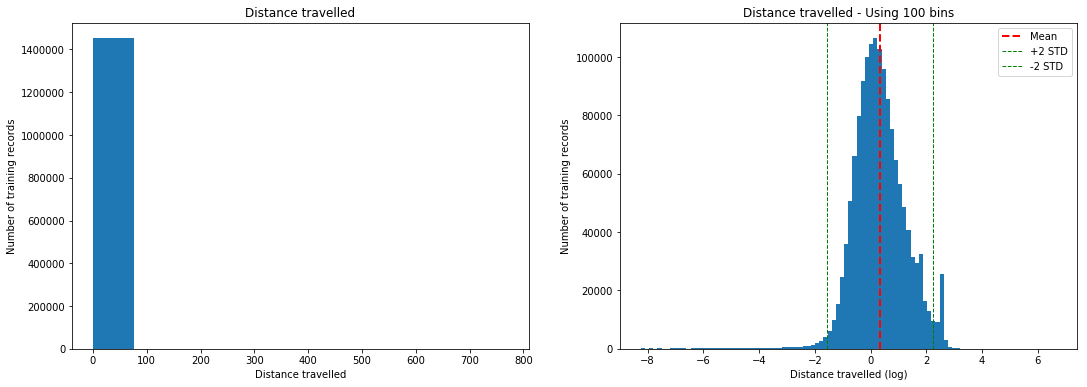

In [201]:
#Approximate radius of earth
R = 3961 #Miles
#R = 6373 #Km


def distance(row):
    lat1 = math.radians(row['pickup_latitude'])
    lon1 = math.radians(row['pickup_longitude'])
    
    lat2 = math.radians(row['dropoff_latitude'])
    lon2 = math.radians(row['dropoff_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    temp = (R * c)
    if(temp <= 0):
        #No movement
        return np.nan
    return temp
    
#train['distanceTravelled'] = train.apply (lambda x: distance(x), axis=1)

#Some of the fields had no movement and as a result are dropped
train.dropna()

#Plotting the distance travelled on a histograph for observation purposes 
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(train['distanceTravelled'])
plt.title("Distance travelled")
plt.xlabel("Distance travelled")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(train['distanceTravelled']), bins=100)
plt.axvline(np.log(train['distanceTravelled']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(train['distanceTravelled']).mean() + 2*np.log(train['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(train['distanceTravelled']).mean() + -2*np.log(train['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Distance travelled - Using 100 bins")
plt.xlabel("Distance travelled (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()

Trips travelled further than:
	20 miles: 442 | 0.030%
	100 miles: 13 | 0.001%

Trips travelled less than:
	0.10 miles: 9473 | 0.649%
	0.01 miles: 3379 | 0.232%


Removing: 9915 rows


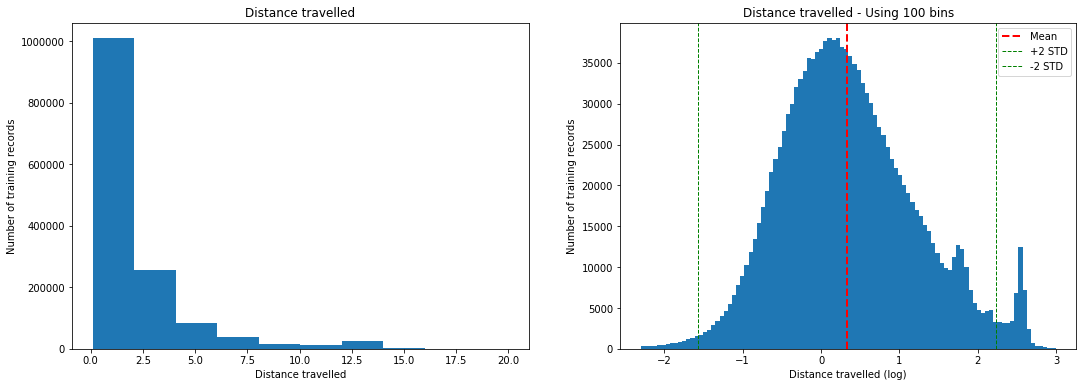

In [208]:

bob = train

print("Trips travelled further than:")
print('\t20 miles: %d | %0.3f%%' % (sum(bob['distanceTravelled'] > 20), (sum(bob['distanceTravelled'] > 20)/len(bob))*100))
print('\t100 miles: %d | %0.3f%%' % (sum(bob['distanceTravelled'] > 100), (sum(bob['distanceTravelled'] > 100)/len(bob))*100))
print("")

print("Trips travelled less than:")
print('\t0.10 miles: %d | %0.3f%%' % (sum(bob['distanceTravelled'] <= 0.1), (sum(bob['distanceTravelled'] <= 0.1)/len(bob))*100))
print('\t0.01 miles: %d | %0.3f%%' % (sum(bob['distanceTravelled'] <= 0.01), (sum(bob['distanceTravelled'] <= 0.01)/len(bob))*100))
print("\n")

print("Removing:", sum(bob['distanceTravelled'] > 20) + sum(bob['distanceTravelled'] <= 0.1), "rows")
bob = bob.drop(bob[bob.distanceTravelled > 20].index)
bob = bob.drop(bob[bob.distanceTravelled <= 0.1].index)



#Plotting the distance travelled on a histograph for observation purposes 
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(bob['distanceTravelled'])
plt.title("Distance travelled")
plt.xlabel("Distance travelled")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(bob['distanceTravelled']), bins=100)
plt.axvline(np.log(train['distanceTravelled']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(train['distanceTravelled']).mean() + 2*np.log(train['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(train['distanceTravelled']).mean() + -2*np.log(train['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Distance travelled - Using 100 bins")
plt.xlabel("Distance travelled (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()


### Map of Manhatten - Runyu

* add words *

In [ ]:
#CODE

### Accuracy Checker

In order to determine how accurate the model is, the user will have to compare the the predicted results against the actual results. There are two approaches that can be taken, an exact comparison where only a '1' will be returned if the predicted durations is exactly the same, or an approximate duration where a percentage-out is allowed

In [145]:
def accuracy(actual, predicted, percentage=0):
    #The two lists need to be of the same size
    if(len(actual) != len(predicted)):
        return np.nan
    
    if(approx == 0):
        temp = actual == predicted
    else:
        temp = ((approx * percentage) <= predicted) & (predicted <= ((1 + percentage) * actual))
    
    return (sum(temp)/len(actual)*100)    

### Plot actual vs Predicted - Tze-yi

* add words *

In [146]:
#CODE

### Principal component analysis (PCA) - Tze-yi

* add words *

In [147]:
#CODE

### XGBoost

* add words *

In [148]:
#CODE